In [1]:
import os
import numpy as np
import pandas as pd
files = os.listdir('./data/')

tline_top_files = [file for file in files if '6990' in file]
tline_lodge_files = [file for file in files if '5880' in file]
meadows_files = [file for file in files if '5380' in file]
meadows_top_files = [file for file in files if '7300' in file]

print(tline_top_files)
print()
print(tline_lodge_files)
print()
print(meadows_files)
print()
print(meadows_top_files)

['Timberline-MagicMile_6990_feet_2014.csv', 'Timberline-MagicMile_6990_feet_2017.csv', 'Timberline-MagicMile_6990_feet_2016.csv', 'Timberline-MagicMile_6990_feet_2015.csv']

['TimberlineLodge_5880_feet_2017.csv', 'TimberlineLodge_5880_feet_2016.csv', 'TimberlineLodge_5880_feet_2014.csv', 'TimberlineLodge_5880_feet_2015.csv']

['MtHoodMeadowsBase_5380_feet_2015.csv', 'MtHoodMeadowsBase_5380_feet_2017.csv', 'MtHoodMeadowsBase_5380_feet_2014.csv', 'MtHoodMeadowsBase_5380_feet_2016.csv']

['MtHoodMeadows-CascadeExpress_7300_feet_2014.csv', 'MtHoodMeadows-CascadeExpress_7300_feet_2015.csv', 'MtHoodMeadows-CascadeExpress_7300_feet_2016.csv', 'MtHoodMeadows-CascadeExpress_7300_feet_2017.csv']


In [2]:
def assemble(filelist, label):
    frame = pd.DataFrame()
    num_rows = 0
    for file in filelist:
        tmp = pd.read_csv('./data/' + file)
        num_rows += len(tmp)
        tmp.index = tmp['Date/Time (PST)'].map(lambda x: pd.to_datetime(x, utc='America/Los_Angeles'))
        # tmp.index = tmp.index.tz_convert('America/Los_Angeles')
        del(tmp['Date/Time (PST)'])
        tmp.columns = [col.replace(' (")', '').replace(' (deg F)', '').replace(' (mph)', '').replace(' (%)', '').replace(' ', '_') + label for col in tmp.columns]
        frame = pd.concat([frame, tmp])
        print(num_rows, 'added:', len(frame))
    return frame

In [3]:
# tline_top = assemble(tline_top_files, '_tt')
tline_lodge = assemble(tline_lodge_files, '_tl')
meadows = assemble(meadows_files, '_m')

# data other than from Tline is messy
weather = pd.concat([meadows, tline_lodge], axis=1)

8179 added: 8179
16964 added: 16964
18944 added: 18944
27634 added: 27634
8678 added: 8678
16863 added: 16863
19254 added: 19254
28042 added: 28042


In [4]:
weather.sort_index(inplace=True)
weather.head(5)

,Battery_Voltage_(v)_m,Temperature_m,Relative_Humidity_m,Precipitation_m,24_hour_snowfall_m,Snow_Depth_m,Barometric_Pressure_(mb)_m,Battery_Voltage_(v)_tl,Temperature_tl,Relative_Humidity_tl,Wind_Speed_Minimum_tl,Wind_Speed_Average_tl,Wind_Speed_Maximum_tl,Wind_Direction_(deg.)_tl,Precipitation_tl,24_hour_snowfall_tl,Snow_Depth_tl
Date/Time (PST),,,,,,,,,,,,,,,,,
2014-09-23 09:00:00+00:00,13.18,56.67,58.58,0.0,53.50,15.29,1015.629,11.69,54.18,60.46,-0.034,0.572,6.927,267.7,0.0,30.880,4.007
2014-09-23 10:00:00+00:00,13.18,56.67,58.58,0.0,53.50,15.29,NaN,11.69,54.18,60.46,-0.034,0.572,6.927,267.7,0.0,4.007,30.880
2014-09-23 11:00:00+00:00,13.18,55.82,55.47,0.0,53.83,15.43,NaN,11.44,53.69,60.46,-0.034,2.113,8.540,253.8,0.0,3.077,31.350
2014-09-23 12:00:00+00:00,13.16,57.04,59.40,0.0,54.43,13.56,NaN,11.70,54.79,64.29,-0.034,3.683,12.170,236.7,0.0,3.077,31.410
2014-09-23 13:00:00+00:00,13.18,55.58,64.75,0.0,55.76,13.49,NaN,11.17,53.57,70.40,0.000,5.422,16.640,252.7,0.0,-6999.000,30.820


In [5]:
diff = weather.index[1:] - weather.index[:-1]

In [6]:
# eather.drop(weather.index[0], inplace=True)

In [7]:
diff.max()  # longest gap without weather data

Timedelta('2 days 00:00:00')

In [8]:
# start picking cleanest rough equivalent data; drop unnecessary stuff also

for col in ['Battery_Voltage_(v)_tl',
            'Battery_Voltage_(v)_m',
            'Wind_Speed_Minimum_tl']:
    weather.drop(col, axis=1, inplace=True)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
weather['24_hour_snowfall_tl'].fillna(method='ffill', inplace=True)
weather['24_hour_snowfall_m'].fillna(method='ffill', inplace=True)
weather['24_hour_snowfall_m'][-1]

0.040999999999999995

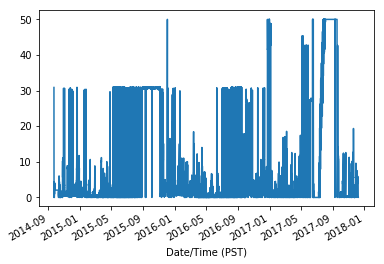

In [11]:
weather['24_hour_snowfall_tl'].clip(0, 50).plot()   # data is pretty messed up...

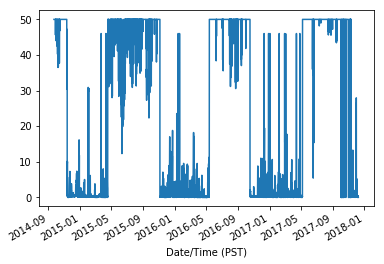

In [12]:
weather['24_hour_snowfall_m'].clip(0, 50).plot()   # pretty messed up...

In [13]:
weather['24_hour_snowfall'] = np.minimum(weather['24_hour_snowfall_tl'].clip(0, 30), 
                                         weather['24_hour_snowfall_m'].clip(0, 30))

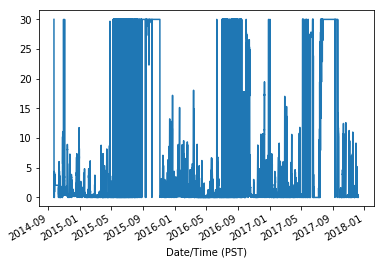

In [14]:
weather['24_hour_snowfall'].plot() # ugly

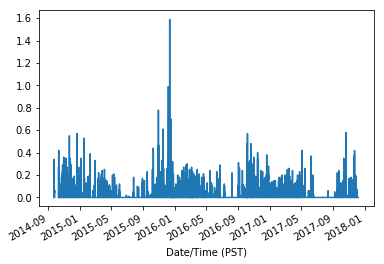

In [15]:
weather['Precipitation_tl'].plot()

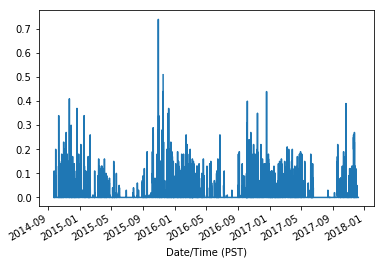

In [16]:
weather['Precipitation_m'].plot()

In [17]:
weather['precip'] = np.minimum(weather.Precipitation_m, weather.Precipitation_tl)

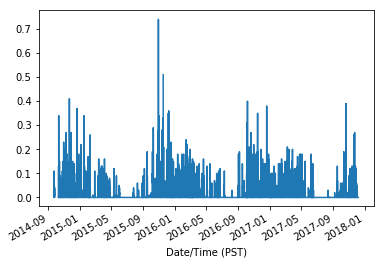

In [18]:
weather.precip.plot()

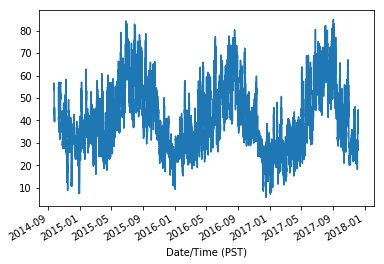

In [19]:
weather.Temperature_tl.plot()   # woo

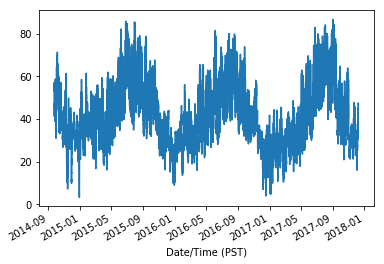

In [20]:
weather.Temperature_m.plot()   # woo

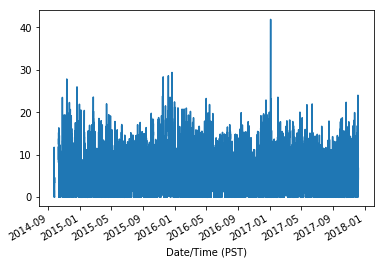

In [21]:
weather.Wind_Speed_Average_tl.plot()

In [22]:
weather.columns

Index(['Temperature_m', 'Relative_Humidity_m', 'Precipitation_m',
       '24_hour_snowfall_m', 'Snow_Depth_m', 'Barometric_Pressure_(mb)_m',
       'Temperature_tl', 'Relative_Humidity_tl', 'Wind_Speed_Average_tl',
       'Wind_Speed_Maximum_tl', 'Wind_Direction_(deg.)_tl', 'Precipitation_tl',
       '24_hour_snowfall_tl', 'Snow_Depth_tl', '24_hour_snowfall', 'precip'],
      dtype='object')

In [23]:
weather.drop(['Precipitation_m', 'Precipitation_tl', '24_hour_snowfall', '24_hour_snowfall_tl', '24_hour_snowfall_m'], axis=1, inplace=True)

In [24]:
weather.columns

Index(['Temperature_m', 'Relative_Humidity_m', 'Snow_Depth_m',
       'Barometric_Pressure_(mb)_m', 'Temperature_tl', 'Relative_Humidity_tl',
       'Wind_Speed_Average_tl', 'Wind_Speed_Maximum_tl',
       'Wind_Direction_(deg.)_tl', 'Snow_Depth_tl', 'precip'],
      dtype='object')

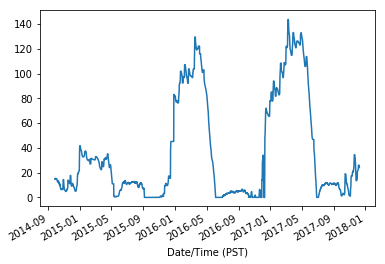

In [36]:
weather.Snow_Depth_m.clip(0).rolling(96).median().fillna(method='ffill').plot()

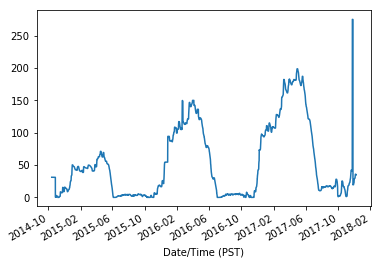

In [37]:
weather.Snow_Depth_tl.clip(0).rolling(96).median().fillna(method='ffill').plot()

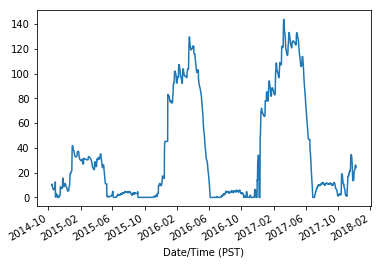

In [39]:
weather['depth'] = np.minimum(weather.Snow_Depth_tl.clip(0).rolling(96).median().fillna(method='ffill'),
                              weather.Snow_Depth_m.clip(0).rolling(96).median().fillna(method='ffill'))
weather.depth.plot()

In [45]:
weather.drop(['Snow_Depth_tl', 'Snow_Depth_m'], axis=1, inplace=True)
weather.columns

Index(['Temperature_m', 'Relative_Humidity_m', 'Barometric_Pressure_(mb)_m',
       'Temperature_tl', 'Relative_Humidity_tl', 'Wind_Speed_Average_tl',
       'Wind_Speed_Maximum_tl', 'Wind_Direction_(deg.)_tl', 'precip', 'depth'],
      dtype='object')

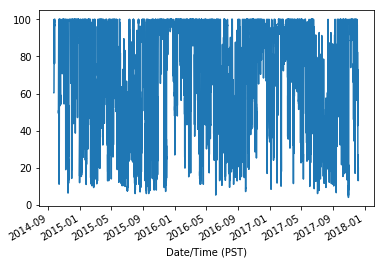

In [42]:
weather.Relative_Humidity_tl.plot()

In [53]:
weather['pressure'] = weather['Barometric_Pressure_(mb)_m'].clip(990)
weather.drop('Barometric_Pressure_(mb)_m', axis=1, inplace=True)
weather.columns

Index(['Temperature_m', 'Relative_Humidity_m', 'Temperature_tl',
       'Relative_Humidity_tl', 'Wind_Speed_Average_tl',
       'Wind_Speed_Maximum_tl', 'Wind_Direction_(deg.)_tl', 'precip', 'depth',
       'pressure'],
      dtype='object')

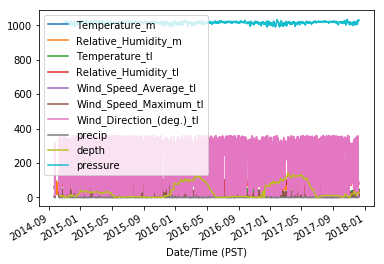

In [54]:
weather.plot()

In [55]:
weather.to_csv('clean_weather_data.csv')